# Model Building 

In [25]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import os
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression




# Load the dataset

In [26]:
final_df = pd.read_csv(r'.\Data\Project_Dataset.csv')
final_df.info()

# Modify the data type as while saving in csv some data types get modified
final_df[['Popular_Restaurant', 'Cuisine_Category_1','Yelp_Price_Category']] = final_df[['Popular_Restaurant', 'Cuisine_Category_1','Yelp_Price_Category']].astype('category')
final_df[['Popular_Restaurant', 'Cuisine_Category_1','Yelp_Price_Category']] .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Columns: 114 entries, Restaurant_ID to Popular_Restaurant
dtypes: float64(8), int64(98), object(8)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Popular_Restaurant   1704 non-null   category
 1   Cuisine_Category_1   1704 non-null   category
 2   Yelp_Price_Category  1704 non-null   category
dtypes: category(3)
memory usage: 12.3 KB


# K Nearest Neighbors Classifier model 

0.8328445747800587
Precision: 0.58
Recall: 0.33
Accuracy: 0.83

Training set performance:
Training Accuracy: 0.92
Training Precision: 0.74
Training Recall: 0.62


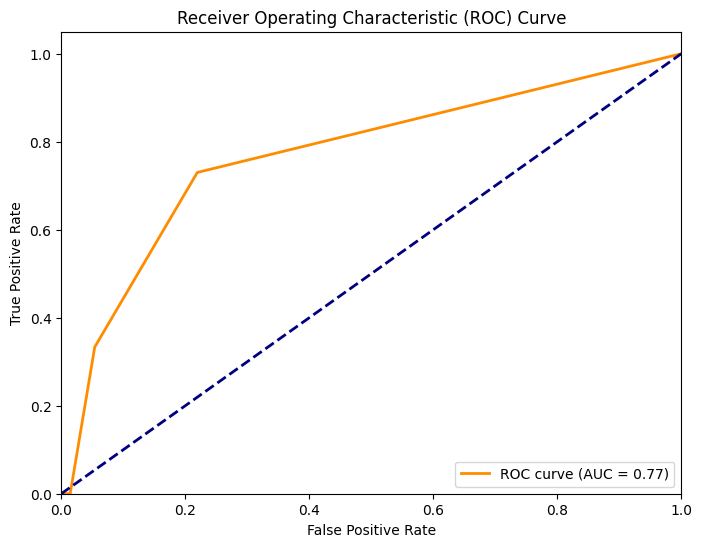

In [29]:
X = final_df[['Yelp_Price_Category', 'Restaurant_Zip_code', 'Cuisine_Category_1', 
              'Review_Count',	'Restaurant_Rating',	'Distance_Bike_Station',	
              'Avg_Gmaps_Location_Rating',	'lodging',	'shopping_mall',	
              'atm',	'bakery',	'bank',	'beauty_salon',	'bicycle_store',	
              'book_store',	'bowling_alley',	'car_dealer',	'car_repair',	
              'church',	'city_hall',	'clothing_store',	'convenience_store',	
              'courthouse',	'dentist',	'department_store',	'doctor',	'electrician',	
              'electronics_store',	'florist',	'furniture_store',	'gym',	'hair_care',	
              'home_goods_store',	'hospital',	'insurance_agency',	'jewelry_store',	
              'liquor_store',	'meal_delivery',	'meal_takeaway',	'parking',	
              'pet_store',	'pharmacy',	'police',	'post_office',	'real_estate_agency',	
              'restaurant',	'school',	'shoe_store',	'spa',	'store',	'supermarket',	
              'travel_agency',	'veterinary_care',	'Total_POI',	'Total_Available_Bike_Slots',	
              'Popular_Restaurant']]
y = final_df['Popular_Restaurant']  # Target variable

# Split the dataset into training and testing sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough')

# Initialize the KNeighborsClassifier with the desired number of neighbors (k)
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the value of n_neighbors

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn_model)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

classification_rep = classification_report(y_test, y_pred, output_dict=True)
precision = classification_rep['1']['precision']
recall = classification_rep['1']['recall']
fscore = classification_rep['1']['f1-score']
support = classification_rep['1']['support']

# Training set performance
y_train_pred = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

classification_rep = classification_report(y_train, y_train_pred, output_dict=True)
train_precision = classification_rep['1']['precision']
train_recall = classification_rep['1']['recall']
train_fscore = classification_rep['1']['f1-score']


# Print performance metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print('\nTraining set performance:')
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

c:\Users\aksha\anaconda3\envs\python_3.11.5\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8181818181818182
Precision: 0.53
Recall: 0.14
Accuracy: 0.82

Training set performance:
Training Accuracy: 0.87
Training Precision: 0.57
Training Recall: 0.26


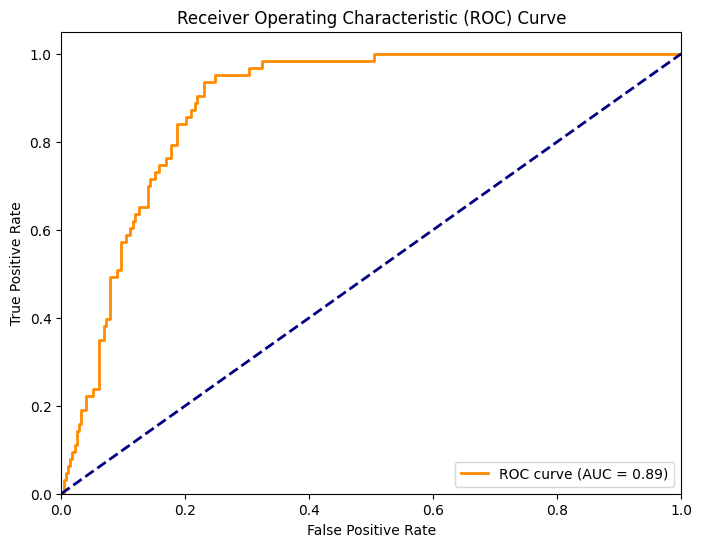

In [30]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough')

# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression()

# Update the pipeline to use Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg_classifier)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

classification_rep = classification_report(y_test, y_pred, output_dict=True)
precision = classification_rep['1']['precision']
recall = classification_rep['1']['recall']
fscore = classification_rep['1']['f1-score']
support = classification_rep['1']['support']

# Training set performance
y_train_pred = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

classification_rep_train = classification_report(y_train, y_train_pred, output_dict=True)
train_precision = classification_rep_train['1']['precision']
train_recall = classification_rep_train['1']['recall']
train_fscore = classification_rep_train['1']['f1-score']

# Print performance metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print('\nTraining set performance:')
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Balanced Random Forest Classifier

0.9970674486803519
Precision: 1.00
Recall: 0.98
Accuracy: 1.00

Training set performance:
Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00


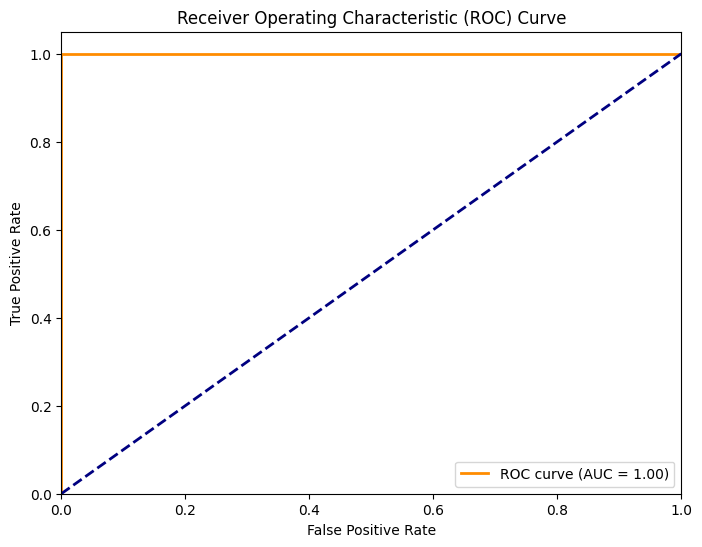

In [184]:

categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough')

from imblearn.ensemble import BalancedRandomForestClassifier

brf_classifier = BalancedRandomForestClassifier(sampling_strategy='all', replacement=True)

# Update the pipeline to use BalancedRandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', brf_classifier)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

classification_rep = classification_report(y_test, y_pred, output_dict=True)
precision = classification_rep['1']['precision']
recall = classification_rep['1']['recall']
fscore = classification_rep['1']['f1-score']
support = classification_rep['1']['support']

# Training set performance
y_train_pred = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

classification_rep = classification_report(y_train, y_train_pred, output_dict=True)
train_precision = classification_rep['1']['precision']
train_recall = classification_rep['1']['recall']
train_fscore = classification_rep['1']['f1-score']


# Print performance metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print('\nTraining set performance:')
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest (Tuned)

0.9237536656891495
Precision: 1.00
Recall: 0.59
Accuracy: 0.92

Training set performance:
Training Accuracy: 0.96
Training Precision: 1.00
Training Recall: 0.70


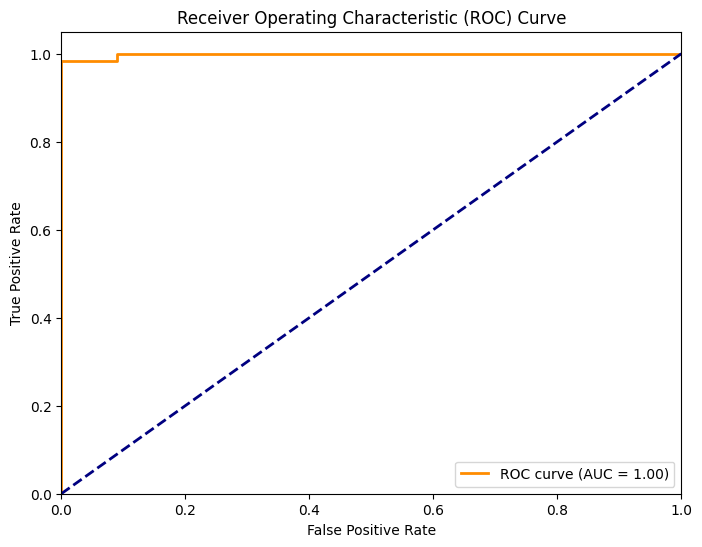

In [31]:
rf_classifier = RandomForestClassifier(n_estimators=4, max_depth=5, random_state=42)

# Update the pipeline with the new classifier
pipeline.set_params(classifier=rf_classifier)

# Fit the model and evaluate as before
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

classification_rep = classification_report(y_test, y_pred, output_dict=True)
precision = classification_rep['1']['precision']
recall = classification_rep['1']['recall']
fscore = classification_rep['1']['f1-score']
support = classification_rep['1']['support']

# Training set performance
y_train_pred = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

classification_rep_train = classification_report(y_train, y_train_pred, output_dict=True)
train_precision = classification_rep_train['1']['precision']
train_recall = classification_rep_train['1']['recall']
train_fscore = classification_rep_train['1']['f1-score']

# Print performance metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print('\nTraining set performance:')
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




# Change the model prediction threshold to adjust for class imbalance

In [32]:
from sklearn.metrics import precision_recall_fscore_support

y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Probability of class 1

# Choose a new threshold (e.g., 0.3)
new_threshold = 0.3

# Adjust predictions based on the new threshold
y_pred_adjusted = (y_pred_proba > new_threshold).astype(int)

# Evaluate the model with the adjusted predictions
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred_adjusted, average='binary')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

y_train_pred_proba = pipeline.predict_proba(X_train)[:, 1]  # Probability of class 1

# Adjust predictions based on the new threshold
y_train_pred_adjusted = (y_train_pred_proba > new_threshold).astype(int)

# Evaluate the model on the training set with the adjusted threshold
train_accuracy = accuracy_score(y_train, y_train_pred_adjusted)
train_precision, train_recall, train_fscore, _ = precision_recall_fscore_support(y_train, y_train_pred_adjusted, average='binary')


# Print performance metrics
print('Training Metrics:')
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')

Accuracy: 0.93
Precision: 0.72
Recall: 1.00
Training Metrics:
Training Accuracy: 0.93
Training Precision: 0.67
Training Recall: 1.00


### We will be selecting the tuned random forest owing to it's consistent performance on training and test sets. 